#### The candidate scoring analysis

In [1]:
from set_the_candidate_score_dict import the_candidate

import numpy as np
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# print the graphs in the notebook
%matplotlib inline
# set seaborn style to white
sns.set_style("white")

In [2]:
#From `set_the_candidate_score_dict.py` import the_candidate
given_person = pd.DataFrame(dict(the_candidate).items())
# Set Tottal score to df
tottal_score = given_person.sum(axis=0)[1]
df_score = pd.DataFrame({'Totall_Score': tottal_score}.items()) 
given_person = df_score.append(given_person).reset_index(drop=True)

In [3]:
# Download samples data: Best 10k, 50k, 100k from General population 1 000 000  
df_100k = pd.read_csv('best_100k.csv', sep=',', encoding='utf-8')
df_50k = pd.read_csv('best_50k.csv', sep=',', encoding='utf-8')
df_10k = pd.read_csv('best_10k.csv', sep=',', encoding='utf-8')

In [4]:
# Calculate means and clean df
mean_100k = df_100k.mean().drop(['Unnamed: 0'])
mean_50k = df_50k.mean().drop(['Unnamed: 0'])
mean_10k = df_10k.mean().drop(['Unnamed: 0'])

In [5]:
# Successive approximation method. Mean of Means
df_mean_variation = pd.DataFrame({"mean_best_10k": mean_10k, "mean_best_50k": mean_50k, "mean_best_100k": mean_100k})
df_mean_variation['Mean of means'] = df_mean_variation.mean(axis=1)
df_mean_variation

mean_best_10k  mean_best_50k  mean_best_100k  \
Totall_Score                         73.2726       66.91410        63.51558   
Years_of_Expirience                   6.7280        6.41074         6.27026   
Coding_skill                          7.4536        6.98998         6.76923   
System_architect_knowledge            3.2470        3.04378         2.94676   
Common_knowledge                      7.4523        6.99524         6.75718   
Algorithms_data_struct                7.3285        6.80536         6.52189   
Soft_Skill                            3.2115        3.03992         2.95607   
Recommendation                        0.8096        0.72880         0.69457   
Education                             3.1663        3.06004         3.01953   
First_impression                      3.6437        3.20420         2.96457   
Communication                         7.0964        6.18652         5.67332   
Willness_to_learn                     7.0273        6.13750         5.67066   
Certificates                          1.9673        1.92076         1.89421   
Willness_to_knowledge_sharing         7.0871        6.20406         5.68977   
Motivation                            7.0540        6.18720         5.68756   

                               Mean of means  
Totall_Score                       67.900760  
Years_of_Expirience                 6.469667  
Coding_skill                        7.070937  
System_architect_knowledge          3.079180  
Common_knowledge                    7.068240  
Algorithms_data_struct              6.885250  
Soft_Skill                          3.069163  
Recommendation                      0.744323  
Education                           3.081957  
First_impression                    3.270823  
Communication                       6.318747  
Willness_to_learn                   6.278487  
Certificates                        1.927423  
Willness_to_knowledge_sharing       6.326977  
Motivation                          6.309587

In [6]:
# The Means of samples in table view.
table_mean_view = pd.DataFrame([mean_100k, mean_50k, mean_10k])
table_mean_view.rename(index={0:'100k', 1: '50k', 2:'10k'}, inplace=True)
table_mean_view

Totall_Score  Years_of_Expirience  Coding_skill  \
100k      63.51558              6.27026       6.76923   
50k       66.91410              6.41074       6.98998   
10k       73.27260              6.72800       7.45360   

      System_architect_knowledge  Common_knowledge  Algorithms_data_struct  \
100k                     2.94676           6.75718                 6.52189   
50k                      3.04378           6.99524                 6.80536   
10k                      3.24700           7.45230                 7.32850   

      Soft_Skill  Recommendation  Education  First_impression  Communication  \
100k     2.95607         0.69457    3.01953           2.96457        5.67332   
50k      3.03992         0.72880    3.06004           3.20420        6.18652   
10k      3.21150         0.80960    3.16630           3.64370        7.09640   

      Willness_to_learn  Certificates  Willness_to_knowledge_sharing  \
100k            5.67066       1.89421                        5.68977   
50k             6.13750       1.92076                        6.20406   
10k             7.02730       1.96730                        7.08710   

      Motivation  
100k     5.68756  
50k      6.18720  
10k      7.05400

In [7]:
# Descriptive statistics
table_mean_view.describe()

Totall_Score  Years_of_Expirience  Coding_skill  \
count      3.000000             3.000000      3.000000   
mean      67.900760             6.469667      7.070937   
std        4.952775             0.234490      0.349294   
min       63.515580             6.270260      6.769230   
25%       65.214840             6.340500      6.879605   
50%       66.914100             6.410740      6.989980   
75%       70.093350             6.569370      7.221790   
max       73.272600             6.728000      7.453600   

       System_architect_knowledge  Common_knowledge  Algorithms_data_struct  \
count                    3.000000          3.000000                3.000000   
mean                     3.079180          7.068240                6.885250   
std                      0.153218          0.353263                0.409196   
min                      2.946760          6.757180                6.521890   
25%                      2.995270          6.876210                6.663625   
50%                      3.043780          6.995240                6.805360   
75%                      3.145390          7.223770                7.066930   
max                      3.247000          7.452300                7.328500   

       Soft_Skill  Recommendation  Education  First_impression  Communication  \
count    3.000000        3.000000   3.000000          3.000000       3.000000   
mean     3.069163        0.744323   3.081957          3.270823       6.318747   
std      0.130202        0.059065   0.075800          0.344432       0.720696   
min      2.956070        0.694570   3.019530          2.964570       5.673320   
25%      2.997995        0.711685   3.039785          3.084385       5.929920   
50%      3.039920        0.728800   3.060040          3.204200       6.186520   
75%      3.125710        0.769200   3.113170          3.423950       6.641460   
max      3.211500        0.809600   3.166300          3.643700       7.096400   

       Willness_to_learn  Certificates  Willness_to_knowledge_sharing  \
count           3.000000      3.000000                       3.000000   
mean            6.278487      1.927423                       6.326977   
std             0.689221      0.036998                       0.706728   
min             5.670660      1.894210                       5.689770   
25%             5.904080      1.907485                       5.946915   
50%             6.137500      1.920760                       6.204060   
75%             6.582400      1.944030                       6.645580   
max             7.027300      1.967300                       7.087100   

       Motivation  
count    3.000000  
mean     6.309587  
std      0.691392  
min      5.687560  
25%      5.937380  
50%      6.187200  
75%      6.620600  
max      7.054000

In [8]:
# Convert Mean_of_means_values to dataframe via dict
Mean_of_means_values = df_mean_variation['Mean of means']
Given_candidate_score_values = given_person

Mean_of_means_values = pd.DataFrame(Mean_of_means_values)
Mean_of_means_values_dict = Mean_of_means_values.to_dict()
Mean_of_means_values_dict = Mean_of_means_values_dict['Mean of means']
df_Mean_of_means_values = pd.DataFrame(Mean_of_means_values_dict.items())
#df_Mean_of_means_values

In [9]:
# df Side by Side -> pd.concat([df1, df2], axis=1)
df_count_distance = pd.concat([df_Mean_of_means_values, Given_candidate_score_values], axis=1 )
#Reset column index df = df.T.reset_index(drop=True).T
df_count_distance = df_count_distance.T.reset_index(drop=True).T 
# Drop column by index  df.drop(df.columns[i], axis=1)
df_count_distance = df_count_distance.drop(df_count_distance.columns[2], axis=1)
df_count_distance = df_count_distance.T.reset_index(drop=True).T 
# Rename columns df.rename(columns={ df.columns[1]: "your value" }, inplace = True)
df_count_distance.rename(columns={ df_count_distance.columns[0]: "Skills", 
                                  df_count_distance.columns[1]: "Mean Value",
                                  df_count_distance.columns[2]: "Candidate"  }, inplace = True)

# sum_column = df["col1"] + df["col2"]
distance = df_count_distance['Candidate'] - df_count_distance['Mean Value']
df_count_distance["Distance"] = distance
df_count_distance

Skills Mean Value Candidate   Distance
0                    Totall_Score    67.9008      76.6    8.69924
1             Years_of_Expirience    6.46967         7   0.530333
2                    Coding_skill    7.07094       7.1  0.0290633
3      System_architect_knowledge    3.07918         6    2.92082
4                Common_knowledge    7.06824         7   -0.06824
5          Algorithms_data_struct    6.88525         6   -0.88525
6                      Soft_Skill    3.06916         7    3.93084
7                  Recommendation   0.744323         1   0.255677
8                       Education    3.08196         3 -0.0819567
9                First_impression    3.27082         4   0.729177
10                  Communication    6.31875         6  -0.318747
11              Willness_to_learn    6.27849       6.5   0.221513
12                   Certificates    1.92742         3    1.07258
13  Willness_to_knowledge_sharing    6.32698         6  -0.326977
14                     Motivation    6.30959         7   0.690413

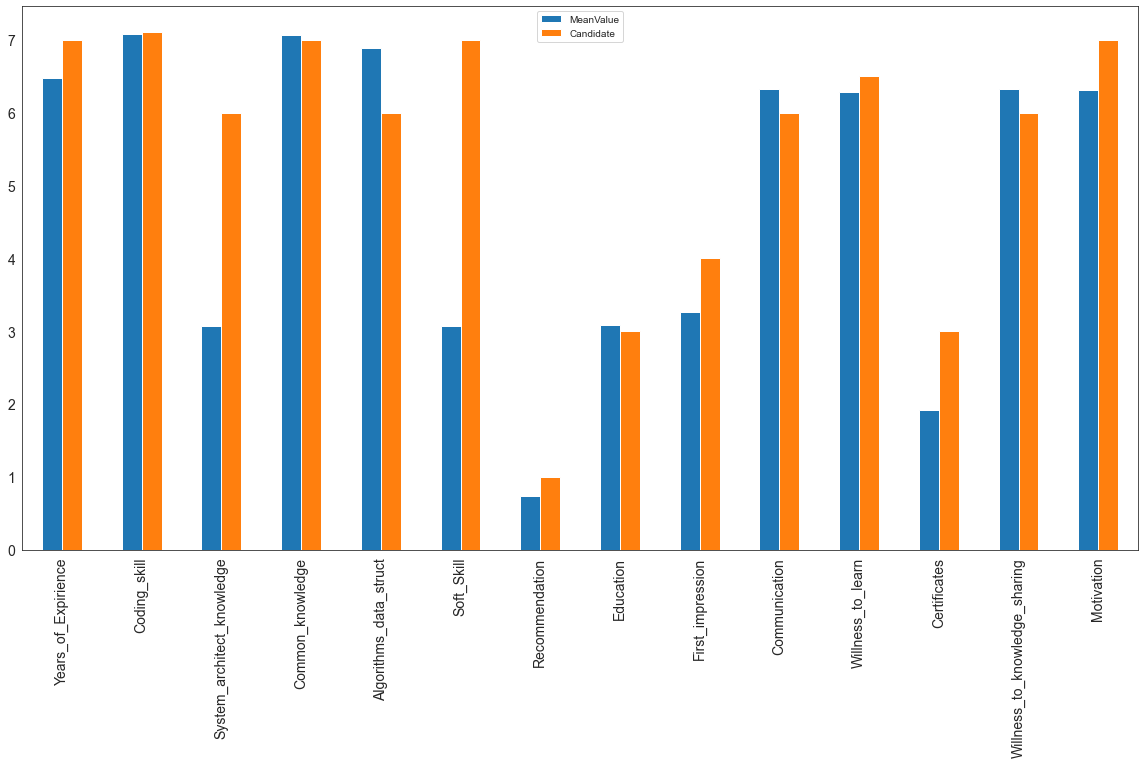

In [10]:
# PLOT
mean_value = list(df_count_distance['Mean Value'])
mean_value.pop(0)
candidate = list(df_count_distance['Candidate'])
candidate.pop(0)
index = list(df_count_distance['Skills'])
index.pop(0)
df = pd.DataFrame({'MeanValue': mean_value,'Candidate': candidate}, index=index)
ax = df.plot.bar(figsize=(20,10), rot=90, fontsize=14)